<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
from sklearn.impute import SimpleImputer

df_n= df.drop(['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo',
                 'consumo_tipo', 'co2_tipo', 'year'],axis=1)

si = SimpleImputer(strategy='mean')
si.fit(df_n)
df_n= pd.DataFrame(si.fit_transform(df_n))

df_n = df_n.rename(columns={ 0: 'desplazamiento', 1: 'cilindros', 2: 'co2' , 3: 'consumo_litros_milla'})

scaler = MinMaxScaler()
columns = df_n.columns
df_n[columns] = scaler.fit_transform(df_n[columns])

df_n.head()

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294


In [4]:
df_cat= df.drop(['desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla'],axis=1)
df_cat=pd.get_dummies(df_cat)
df_procesado= pd.merge(df_n.reset_index(), df_cat.reset_index(), on='index', how='left')
df_procesado=df_procesado.drop(['index'],axis=1)
df_procesado

,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,1984,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,1984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,1985,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,1985,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,1987,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878,2015,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.038462,0.071429,0.174919,0.090196,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.038462,0.071429,0.182174,0.096886,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.038462,0.071429,0.176532,0.090196,2017,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))

# etiquetar los datos con los clusters encontrados
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
for i in range(0,8):
    print("Media de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mean())
    print("\n ############################ \n")

Media de variables numéricas del cluster 1
desplazamiento          0.336339
cilindros               0.250937
co2                     0.378917
consumo_litros_milla    0.307841
dtype: float64

 ############################ 

Media de variables numéricas del cluster 2
desplazamiento          0.369496
cilindros               0.282055
co2                     0.334626
consumo_litros_milla    0.260714
dtype: float64

 ############################ 

Media de variables numéricas del cluster 3
desplazamiento          0.351309
cilindros               0.278636
co2                     0.370855
consumo_litros_milla    0.301189
dtype: float64

 ############################ 

Media de variables numéricas del cluster 4
desplazamiento          0.331892
cilindros               0.244566
co2                     0.372419
consumo_litros_milla    0.297856
dtype: float64

 ############################ 

Media de variables numéricas del cluster 5
desplazamiento          0.336922
cilindros               0.263303

In [6]:
for i in range(0,8):
    print("Moda de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mode())
    print("\n ############################ \n")

Moda de variables numéricas del cluster 1
   desplazamiento  cilindros       co2  consumo_litros_milla
0         0.24359   0.142857  0.374603              0.305011

 ############################ 

Moda de variables numéricas del cluster 2
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.317749               0.24183

 ############################ 

Moda de variables numéricas del cluster 3
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.307692   0.285714  0.317749               0.24183

 ############################ 

Moda de variables numéricas del cluster 4
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.142857  0.353657              0.281734

 ############################ 

Moda de variables numéricas del cluster 5
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.374603              0.305011

 ############################ 

Moda de variabl

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [7]:
# implementación de la regla del codo
array = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in array]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':array,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,388786.219762
1,10,203571.642880
2,20,166473.939669
3,30,150090.313920
4,50,126767.476270
5,75,108013.320801
6,100,97328.183437
7,200,77404.293522
8,300,66752.686729


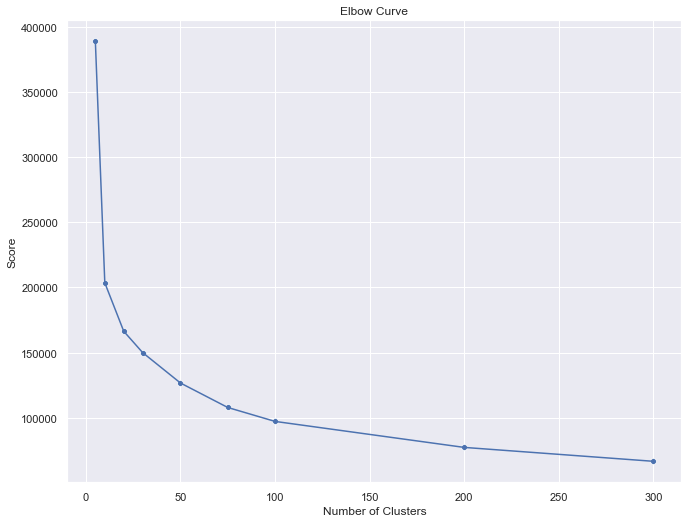

In [8]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters", y="Score", data=df_Elbow)
sns.scatterplot(x="Number of Clusters", y="Score", data=df_Elbow)

Luego, nuestro número óptimo de clusters está entre el intervalo 0-50, pero gráficamente, podemos suponer que el número óptimo está entre 5-25.